In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 14})

# Blackbody Radiation
Max Planck in 1901 published his work modeling the light emitted from objects due to their temperature. He found that the spectral intensity (energy per photon wavelength) follows the temperature and wavelength dependent function

$$u(\lambda)=\frac{8\pi hc}{\lambda^5\left(e^{\frac{hc}{\lambda kT}}-1\right)}$$

The total power of light emitted comes from integrating the equation above and goes as the surface area of the blackbody and its temperature to the fourth power.

$$P=\epsilon \sigma AT^4$$

where $\epsilon$ is a unitless variable describing the efficiency of a blackbody. Think of it as a percentage with 1 being a perfect blackbody. The value $\sigma$ is a physical constant made up of other physical constants

$$\sigma = \frac{2\pi^5k^4}{15h^3c^2} = 5.67\times 10^{-8} {\rm\frac{W}{m^2K^4}}$$

The wavelength of maximum emission can be found

$$\lambda_{max} = \frac{2.898\times 10^{-3}}{T}~{\rm meters}$$

Let's look at the power spectrum function graphically and then, we will see how we can understand the other equations in terms of the spectrum.

In the next cell, 
1. Define the constants $h, c, k, T$
    * Start with an object at room temperature ($T=300{\rm K}$).
2. Create an array of wavelengths using either `np.arange(begin, end, step)` or `np.linspace(begin, end, npts)`
    * You will be adjusting this array when you see the graph.
    * To make the axis look nice, can you make the wavelength array in nm while doing the calculation using meters?
3. Use the constants and the array of wavelengths to calculate the function for the spectrum.
    * You may want to break it into pieces, calculating the exponential part in parentheses separate from the rest.
    * The exponential function is called using `np.exp(x)`.
4. Plot the function recalling commands such as
    * `plt.plot(x, y, 'marker', label='label such as temperature')`
    * `plt.xlabel('xlabel (units)')`
    * `plt.ylabel('ylabel (units)')`
    * `plt.legend()`
    * `plt.show()`

In [ ]:
#Constants in SI units
h = #Joule-seconds
c = #meters/second
k = #Joules/Kelvin
T = #Kelvin

#wavelengths
wl = 

#spectrum
u_wl = 

#plot the function


## Functional Programming
We could write a function to create the array of the spectrum based on an input array of wavelengths and a constant for temperature. This type of programming can be beneficial for repeatedly using the same function to calculate the spectrum for different temperatures. Below is an empty function `planck_black_body` that is created by the define Python `def` keyword. The function requires input of an array `Lambda` and temperature `T`. The input array of wavelengths should be in nanometers. The function converts to meters for calculation. In the function add
* Locally (within the function) define constants $h, c, k, T$.
* Convert wavelength array `Lambda` to meters.
* Add the blackbody function to `u_wl =` so it gets returned by calling the function `planck_black_body`.

In [ ]:
def planck_black_body(Lambda, T):
    """
    Lambda - radiation wavelength in nanometers
    T - temperature in Kelvins"""
    # Note: lambda is a keyword in Python so we need to capitalize it
    l = #Convert nm to meters using Lambda
    h = #J-s
    c = #m/s
    k = #J/K
    u_wl = #define the function. You may break it up if you wish.
    return u_wl

### Check the Function
In the cell below, 
* Create a variable for temperature equal to 300 K.
* Create an array of wavelengths as you did above.
    * `wl = np.linspace()` for example
* Run the function to create an array of `u_wl`.
    * `u_wl = planck_black_body(wl, T)`
* Plot the function.
    * `plt.plot(wl, u_wl, '-k', label='T=300 K')`
    * `plt.xlabel('Wavelength (nm)')`
    * `plt.ylabel('Energy Density')`
    * `plt.legend()`
    * `plt.show()`

### Plot Multiple Temperatures
We can use the function `planck_black_body` to plot multiple temperatures all at once. To do this we need to use a loop to go from a beginning temperture `T1` to an ending temperature `T2` in some temperature increment `dT`. We will use a `for` loop that does exactly this. In the cell below, enter values for `T1`, `T2`, and `dT`. You should cover a range from about 1000 K up to temperatures of the surfaces of stars (10 000 Kelvin). You do not want to crowd your graph. Therefore, set the `dT` so that only about 10 temperatures are plotted.

Inside the for loop, you need to call the function that creates the spectrum and set it equal to a variable that can be used to plot. In the code below, the array being plotted is `y`. As the program loops, the temperature in each loop iteration is `i`. As the temperature increases with each loop, `y` gets overwritten with the new spectrum each time through the loop. Therefore, we need to plot y vs wavelength inside the loop.

In [ ]:
T1 = 100    # In Kelvins
T2 = 1100
dT = 100
lambdas = np.arange(100, 5000., 1.)
for i in range(T1,T2,dT):
    y = 
    lab = "T = " + str(i)
    plt.plot(lambdas, y, label=lab)

plt.ylabel("Energy density")
plt.xlabel("Wavelength (nm)")
plt.legend()
plt.show()

## Peak Emission Wavelength
We can use the following relation to determine the wavelength of maximum blackbody radiation emission.

$$\lambda_{max} = \frac{2.898\times 10^{-3}}{T}~{\rm meters}$$

Then, we can add a line or symbol indicating this to our graph. Using the function `planck_black_body` to make a single spectrum at 6500 K, let's plot the spectrum and add a symbol at the peak. To add the symbol, we will plot the single point located on the x-axis at $\lambda_{max}$. We will locate the y-axis position by using this wavelength to calculate the spectral value. The following lines of code will do this.

```python
T = 6500  #set the temperature
wl_max = 2.898e-3/T #calculate the wavelength where the spectrum is maximum
u_max = planck_black_body(wl_max, T)#calculate the  value of the spectrum at the wavelength
plt.plot(wl_max, u_max, '*k')
```

You can, of course, print the wavelength where the spectrum is a maximum too.

```python
print(wl_max)
```

In [ ]:
#set the temperature
#create the full array of wavelengths
#calculate the spectrum
#calculate the wavelength where the spectrum is maximum
#calculate the  value of the spectrum at the wavelength

#plot the spectrum
#plot the maximum point
#xlabels
#ylabels
#legend
#show plot

## Integration
We need to integrate the spectral function over all wavelengths at a particular temperature to determine the total power per surface area that a blackbody emits. We can do this integration for multiple temperatures to evaluate whether it follows a $T^4$ dependence.

$$P = \epsilon\sigma A T^4$$

Since we are looking at blackbody radiation from a graphical viewpoint, we will do the integral numerically. We can integrate by using a Riemann sum. To do this we take the value of the spectrum at each wavelength and assume a rectangle centered at this y-value spans half of $\Delta\lambda$ downward and half upward. The rectangle then has an area $u(\lambda)\cdot\Delta\lambda$. We sum these rectangles over the spectrum (as much of the spectrum has significant contribution).

$$\int_0^\infty u(\lambda)d\lambda \approx \sum_i u(\lambda)_i\cdot\Delta\lambda$$

For wavelengths created with `np.linspace(100, 5000, 4901)`, $\Delta\lambda = 1~{\rm nm}$, which should be sufficient. If you use `np.arange` for the wavelengths, you have given that function the value of $\Delta\lambda$ as the third parameter.

There is also a built-in numerical integrator in `scipy`. It is imported above as `from scipy import integrate`. The integration is performed using a function called `quad`. Below, the spectrum is defined using a `lambda` function rather than a `def` function. The integration is then performed at 6500 K over a range of wavelengths from 100 nm to 5 $\mu$m. The second number from the `quad` integration is the error in that calculation.

The code below shows how to do these calculations. You can adjust the temperature to see how it affects the integrals. How do you expect the integral to change as you increase the temperature?

In [124]:
T = 6500
#Manual numerical integration
wl = np.arange(100, 5000, 1)
u_wl = planck_black_body(wl, T)
print(np.sum(u_wl*1e-9))

#Numerical integration with scipy
f = lambda x, T: 8*np.pi*h*c/x**5/(np.exp(h*c/x/k/T)-1)
y, err = integrate.quad(f, 1e-7, 5e-6, args=(T,))

print(y, err)

1.3401666267165147
1.3401680025294826 1.036573150207017e-10


How do the two methods compare? What could you do to improve the Riemann sum to get better agreement? Give your hypothesis a try above.

Let's wrap the integration in a loop so that we can calculate multiple temperatures and the uncertainty in the numerical integration. Then, we can plot the result.
1. Create an array `T` with a range of temperatures from 1000 to 10000 in steps of 1000
2. Initialize arrays to store the integral and the error using the `np.zeros` function. They should have the same number of elements as the temperature array.
    * `u_int = np.zeros(len(T))`
    * `err_int = np.zeros(len(T))`
3. In each iteration of the loop, calculate the integral and error and store it in the element i of the arrays.
    * `u_int[i], err_int[i] = integrate.quad(f, 1e-7, 5e-6, args=(T[i],))`
4. Plot the integral values as a function of temperature.
    * `plt.errorbar(T, u_int, yerr=err_int, fmt='ok', ecolor=None, elinewidth=1.0, capsize=1.0, capthick=1.0)`

In [ ]:
f = lambda x, T: 8*np.pi*h*c/x**5/(np.exp(h*c/x/k/T)-1)
T = np.arange(1000, 11000, 1000)
u_int = np.zeros(len(T))
err_int = np.zeros(len(T))
for i in range(len(T)):
    u_int[i], err_int[i] = 
    
plt.errorbar(x, y, yerr, fmt, ...)
plt.ylabel(r'$P/A (W/m^2)$')
plt.xlabel('Temperature (K)')
plt.show()

### Fitting the $T^4$ Behavior
The graph above should look like a power law, but is it fourth power power law? Let's curve fit it to find out. We will fit a power law function

$$\frac{P}{A} = C T^p$$

The $C$ is a value that should be $\sigma\epsilon = 5.67\times 10^{-8}~{\rm W/m^2K^4}$ and we expect $p=4$. In the code below, make the function `return` the right hand side of the function written above. **Calling the function in your code later sets the left hand side.**

In [ ]:
def T4(x, C, p):
    return 

#Curve fit using the function above
fit_params, fit_cov = curve_fit(T4, T, u_int, p0=(1e-8,1), sigma=err_int, absolute_sigma=True)
print(fit_params, fit_cov)

#Make arrays for the fit function
x_fit = np.arange(100,11000,100) #since it is a power law, we want lots of points to make it look smooth 
y_fit = T4(x_fit,fit_params[0],fit_params[1])

#plot the original data and the fit function
plt.errorbar(T, u_int, yerr=err_int, fmt='ok', ecolor=None, elinewidth=1.0, capsize=1.0, capthick=1.0)
plt.plot(x_fit, y_fit, '-k', label='fit')
plt.ylabel(r'$P/A (W/m^2)$')
plt.xlabel('Temperature (K)')
plt.show()

## Solutions

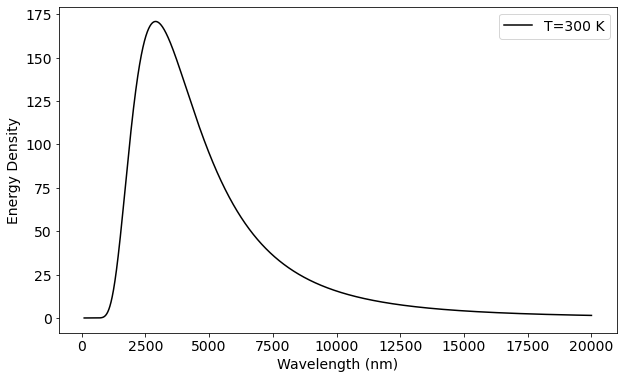

In [30]:
#Constants in SI units
h = 6.626e-34#Joule-seconds
c = 3e8#meters/second
k = 1.38e-23#Joules/Kelvin
T = 1000#Kelvin

#wavelengths
wl = np.linspace(100,20000, 5000)

#spectrum
wlm = wl*1e-9
prefactor = 8 * np.pi * h * c / wlm**5
hc_over_kT = h * c / k / T
exponential = np.exp(hc_over_kT/ wlm)
u_wl = prefactor / (exponential-1)

#plot the function
plt.plot(wl, u_wl, '-k', label='T=300 K')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Energy Density')
plt.legend()
plt.show()

In [18]:
def planck_black_body(Lambda, T):
    """
    Lambda - radiation wavelength in nanometers
    T - temperature in Kelvins"""
    # Note: lambda is a keyword in Python so we need to capitalize it
    # Convert to meters
    l = Lambda*1e-9
    h = 6.626e-34
    c = 3e8
    k = 1.38e-23
    prefactor = 8 * np.pi * h * c / l**5
    hc_over_kT = h * c / k / T
    exponential = np.exp(hc_over_kT/ l)
    rho = prefactor / (exponential-1)
    return rho

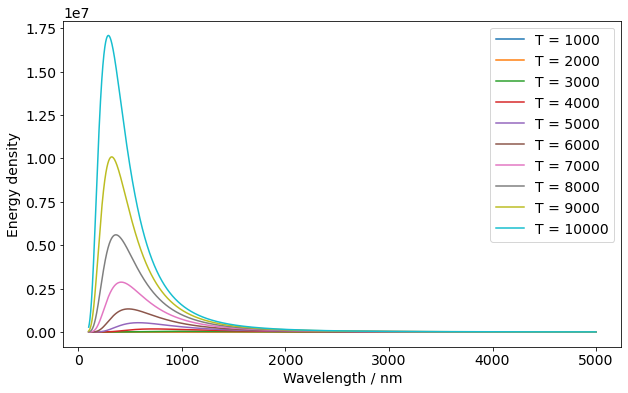

In [32]:
T1 = 1000    # In Kelvins
T2 = 11000
dT = 1000
lambdas = np.arange(100, 5000., 1.)
for i in range(T1,T2,dT):
    y = planck_black_body(lambdas, i)
    integral = np.around(np.sum(y), decimals=1)
    lab = "T = " + str(i)
    plt.plot(lambdas, y, label=lab)

plt.ylabel("Energy density")
plt.xlabel("Wavelength (nm)")
plt.legend()
plt.show()

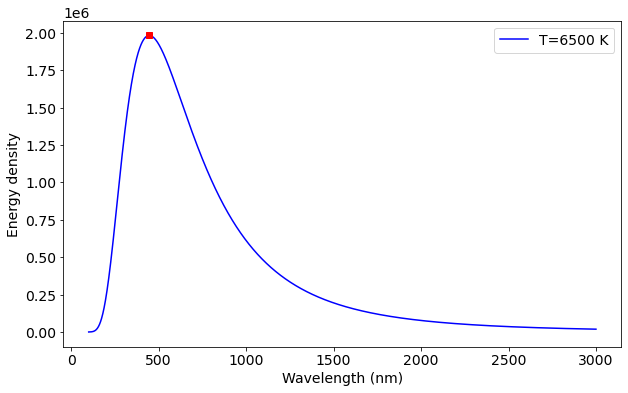

In [49]:
T = 6500 #set the temperature
wl = np.linspace(100, 3000, 2900) #create the full array of wavelengths
u_wl = planck_black_body(wl, T) #calculate the spectrum
wl_max = 2.898e-3/T*1e9 #calculate the wavelength where the spectrum is maximum
u_max = planck_black_body(wl_max, T)#calculate the  value of the spectrum at the wavelength

plt.plot(wl, u_wl, '-b', label='T=6500 K')#plot the spectrum
plt.plot(wl_max, u_max, 'sr')#plot the maximum point
plt.ylabel("Energy density")#xlabels
plt.xlabel("Wavelength (nm)")#ylabels
plt.legend()#legend
plt.show()#show plot

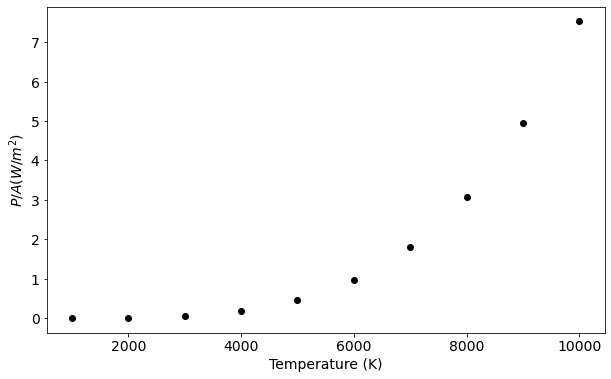

In [142]:
f = lambda x, T: 8*np.pi*h*c/x**5/(np.exp(h*c/(x*k*T))-1)
T = np.arange(1000, 11000, 1000)
u_int = np.zeros(len(T))
err_int = np.zeros(len(T))
for i in range(len(T)):
    u_int[i], err_int[i] = integrate.quad(f, 1e-7, 5e-6, args=(T[i],))
    
plt.errorbar(T, u_int, yerr=err_int, fmt='ok', ecolor=None, elinewidth=1.0, capsize=1.0, capthick=1.0)
plt.ylabel(r'$P/A (W/m^2)$')
plt.xlabel('Temperature (K)')
plt.show()

[5.86572763e-16 4.02845944e+00] [[ 2.40845954e-50 -4.91272653e-36]
 [-4.91272653e-36  1.00225087e-21]]


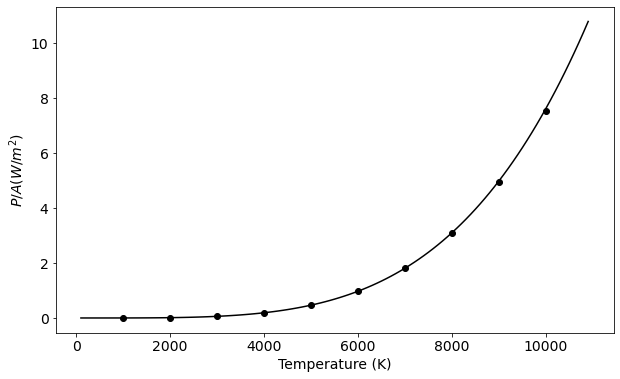

In [144]:
def T4(x, C, p):
    return C*x**p

fit_params, fit_cov = curve_fit(T4, T, u_int, p0=(1e-8,1), sigma=err_int, absolute_sigma=True)
print(fit_params, fit_cov)

x_fit = np.arange(100,11000,100)
y_fit = T4(x_fit,fit_params[0],fit_params[1])

plt.errorbar(T, u_int, yerr=err_int, fmt='ok', ecolor=None, elinewidth=1.0, capsize=1.0, capthick=1.0)
plt.plot(x_fit, y_fit, '-k', label='fit')
plt.ylabel(r'$P/A (W/m^2)$')
plt.xlabel('Temperature (K)')
plt.show()

# Sympy would be nice
I can't get this to work on the function of interest as of 02/08/2023.

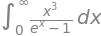

In [54]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
integrate(x**(3)/(exp(x)-1),(x, 0, oo))

In [53]:
integrate(x, (x, 0, 1))

## As a function of energy
We can use the energy formulation of the blackbody spectrum. Then, the coefficient is simpler to determine.

$$u(x) = \frac{8\pi}{\left(hc\right)^3}\frac{E^3}{e^{\frac{E}{kT}}-1}$$

which can be rewritten

$$u(x) = \frac{8\pi\left(kT\right)^4}{\left(hc\right)^3}\frac{x^3}{e^{x}-1}$$

where $x=\frac{E}{kT}$ is a unitless quantity. After integrating to get the energy density

$$\frac{U}{V} = \frac{8\pi\left(kT\right)^4}{\left(hc\right)^3}\int\frac{x^3}{e^{x}-1}dx$$

The coefficient is

$$C = \frac{8\pi k^4}{\left(hc\right)^3} = $$

[7.53607293e-16 4.00000000e+00] [[ 6.22720208e-47 -9.46905708e-33]
 [-9.46905708e-33  1.44273017e-18]]


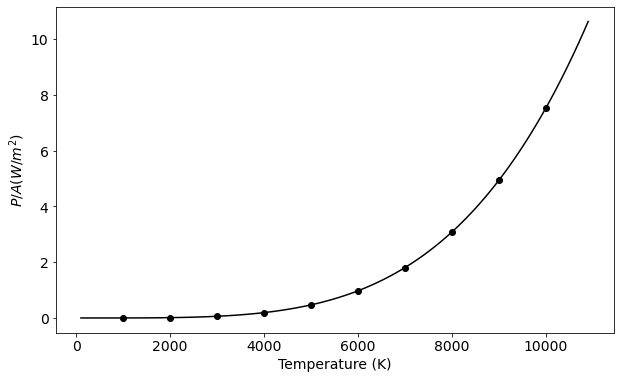

In [2]:
h = 6.626e-34
c = 3e8
k = 1.38e-23

f = lambda x, T: 8*np.pi*(k*T)**4/(h*c)**3*x**3/(np.exp(x)-1)
T = np.arange(1000, 11000, 1000)
u_int = np.zeros(len(T))
err_int = np.zeros(len(T))
for i in range(len(T)):
    u_int[i], err_int[i] = integrate.quad(f, 0, 20, args=(T[i],))
    
def T4(x, C, p):
    return C*x**p

fit_params, fit_cov = curve_fit(T4, T, u_int, p0=(1e-8,1), sigma=err_int, absolute_sigma=True)
print(fit_params, fit_cov)

x_fit = np.arange(100,11000,100)
y_fit = T4(x_fit,fit_params[0],fit_params[1])

plt.errorbar(T, u_int, yerr=err_int, fmt='ok', ecolor=None, elinewidth=1.0, capsize=1.0, capthick=1.0)
plt.plot(x_fit, y_fit, '-k', label='fit')
plt.ylabel(r'$P/A (W/m^2)$')
plt.xlabel('Temperature (K)')
plt.show()